In [1]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summarize-news/summarized_news.csv


In [2]:
df = pd.read_csv('/kaggle/input/summarize-news/summarized_news.csv')

In [5]:
df.head()

,title,article,summary
0,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...","post part Polyarchy , independent blog produce..."
1,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Indianapolis Colts made Andrew Luck highest-pa...
2,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...","DAVOS , Switzerland ( Reuters ) - U.S. Preside..."
3,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,PARIS ( Reuters ) - Former French president Ni...
4,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,Paris Hilton arrived LAX Wednesday dressed pay...


In [6]:
# 1. Loading the language library
import spacy
nlp = spacy.load('en_core_web_sm')

In [13]:
df["summary"][:10]

0    post part Polyarchy , independent blog produce...
1    Indianapolis Colts made Andrew Luck highest-pa...
2    DAVOS , Switzerland ( Reuters ) - U.S. Preside...
3    PARIS ( Reuters ) - Former French president Ni...
4    Paris Hilton arrived LAX Wednesday dressed pay...
5    BERLIN , June 17 ( Reuters ) - ECB board membe...
6    CARACAS ( Reuters ) - Venezuelan authorities a...
7    ‘ Zone ’ something us experienced point other—...
8    Google I/O , company 's big developer conferen...
9    China dismissing unfavorable media reports fak...
Name: summary, dtype: object

In [14]:
# 2. Building a Pipline Object
doc = nlp(df["summary"][:10].to_string(index=False))

In [15]:
from tabulate import tabulate

# Initialize an empty list to store token information
token_info = []

# Iterate over tokens and append token information to the list
for token in doc:
    token_info.append([token.text, token.pos_, token.dep_, token.lemma_])

# Define headers for the table
headers = ["Token", "POS", "Dependency", "Lemma"]

# Print the table using tabulate
print(tabulate(token_info, headers=headers, tablefmt="pretty"))

+--------------+-------+------------+--------------+
|    Token     |  POS  | Dependency |    Lemma     |
+--------------+-------+------------+--------------+
|     post     | VERB  |   advcl    |     post     |
|     part     | NOUN  |    dobj    |     part     |
|  Polyarchy   | PROPN |    dobj    |  Polyarchy   |
|      ,       | PUNCT |   punct    |      ,       |
| independent  |  ADJ  |    amod    | independent  |
|     blog     | NOUN  |   appos    |     blog     |
|   produced   | VERB  |    acl     |   produce    |
|     ...      | PUNCT |   punct    |     ...      |
|              | SPACE |    dep     |              |
| Indianapolis | PROPN |  compound  | Indianapolis |
|    Colts     | PROPN |   nsubj    |    Colts     |
|     made     | VERB  |    ROOT    |     make     |
|    Andrew    | PROPN |  compound  |    Andrew    |
|     Luck     | PROPN |   ccomp    |     Luck     |
|   highest    |  ADJ  |    amod    |     high     |
|      -       | PUNCT |   punct    |      -  

In [16]:
for entity in doc.ents:
    print(f"{entity.text:-<{20}}{entity.label_:-<{20}}{str(spacy.explain(entity.label_))}")

Indianapolis Colts--ORG-----------------Companies, agencies, institutions, etc.
Andrew Luck---------PERSON--------------People, including fictional
DAVOS---------------ORG-----------------Companies, agencies, institutions, etc.
Switzerland---------GPE-----------------Countries, cities, states
Reuters-------------ORG-----------------Companies, agencies, institutions, etc.
Reuters-------------ORG-----------------Companies, agencies, institutions, etc.
French--------------NORP----------------Nationalities or religious or political groups
Nic-----------------PERSON--------------People, including fictional
Paris Hilton--------ORG-----------------Companies, agencies, institutions, etc.
LAX-----------------ORG-----------------Companies, agencies, institutions, etc.
Wednesday-----------DATE----------------Absolute or relative dates or periods
BERLIN--------------ORG-----------------Companies, agencies, institutions, etc.
June 17-------------DATE----------------Absolute or relative dates or per

In [17]:
for chunk in doc.noun_chunks:
    print(chunk.text)

part
Polyarchy
independent blog
Indianapolis Colts
highest-pai
PARIS
( Reuters
Former French president
Paris Hilton
LAX Wednesday dressed pay
BERLIN
June 17 ( Reuters ) - ECB board member
CARACAS
( Reuters
Venezuelan authorities
ar
‘ Zone ’ something
us
point
a
Google I/O
company 's big developer conferenc
China
unfavorable media reports


In [18]:
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance':90})

In [19]:
displacy.render(doc, style='ent', jupyter=True)

In [20]:
from tabulate import tabulate

# Initialize an empty list to store token information
token_info = []

# Iterate over tokens and append token information to the list
for token in doc:
    token_info.append([token.text, token.pos_, token.lemma_, token.lemma_])

# Define headers for the table
headers = ["Token", "POS", "Lemma ID", "Lemma"]

# Print the table using tabulate with borders
print(tabulate(token_info, headers=headers, tablefmt="pretty"))

+--------------+-------+--------------+--------------+
|    Token     |  POS  |   Lemma ID   |    Lemma     |
+--------------+-------+--------------+--------------+
|     post     | VERB  |     post     |     post     |
|     part     | NOUN  |     part     |     part     |
|  Polyarchy   | PROPN |  Polyarchy   |  Polyarchy   |
|      ,       | PUNCT |      ,       |      ,       |
| independent  |  ADJ  | independent  | independent  |
|     blog     | NOUN  |     blog     |     blog     |
|   produced   | VERB  |   produce    |   produce    |
|     ...      | PUNCT |     ...      |     ...      |
|              | SPACE |              |              |
| Indianapolis | PROPN | Indianapolis | Indianapolis |
|    Colts     | PROPN |    Colts     |    Colts     |
|     made     | VERB  |     make     |     make     |
|    Andrew    | PROPN |    Andrew    |    Andrew    |
|     Luck     | PROPN |     Luck     |     Luck     |
|   highest    |  ADJ  |     high     |     high     |
|      -  

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
# This shows the similarity between two news summaries
doc_1 = nlp(df["summary"][1])
doc_2 = nlp(df["summary"][2])

print(doc_1.similarity(doc_2))
print(doc_2.similarity(doc_1))

0.7931027737080035
0.7931027737080035


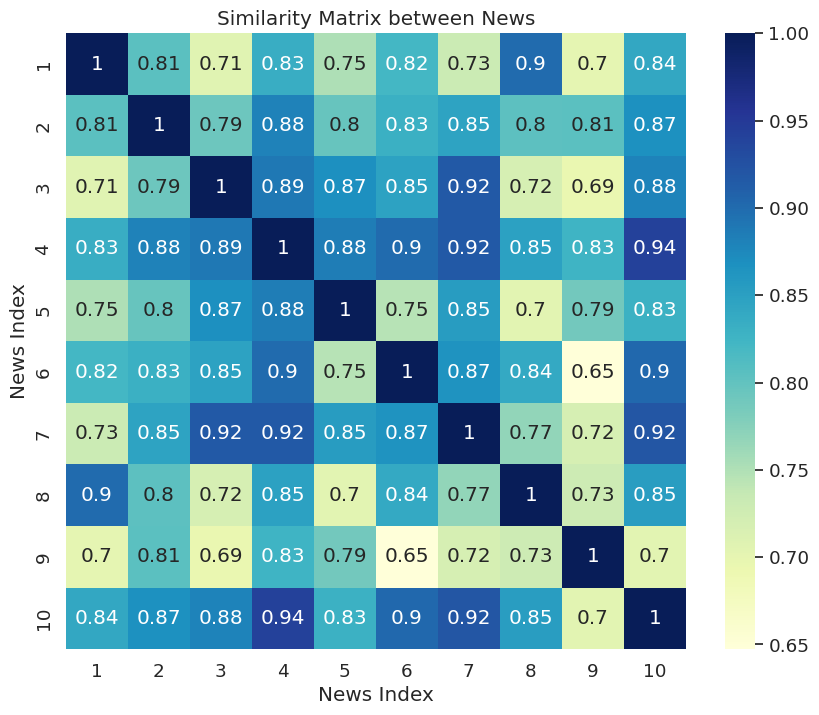

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data["question_text"] contains your list of questions and nlp is your spaCy model
# Make sure you have imported the necessary libraries and initialized the spaCy model (nlp)

# Function to calculate similarity matrix
def calculate_similarity_matrix(news):
    num_news = len(news)
    similarity_matrix = np.zeros((num_news, num_news))
    for i in range(num_news):
        for j in range(num_news):
            similarity_matrix[i, j] = nlp(news[i]).similarity(nlp(news[j]))
    return similarity_matrix

# Assuming df["summary"] contains your list of news
news = df["summary"][:10]  # Take the first 10 news for visualization

# Calculate similarity matrix
similarity_matrix = calculate_similarity_matrix(news)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel("News Index")
plt.ylabel("News Index")
plt.title("Similarity Matrix between News")
plt.show()

In [42]:
#To view the description of either type of tag use spacy.explain(tag)
import spacy
from spacy import displacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Assuming 'data' is your DataFrame containing text data
for text in df["title"].iloc[5:8]:
    # Process the text
    doc = nlp(text)

    # Visualize the dependency parse tree
    displacy.render(doc, style="dep", jupyter=True)

    # Visualize part-of-speech tags
    displacy.render(doc, style="ent", jupyter=True)

### POS Tagging

In [35]:
for text in df["summary"].iloc[3:6]:
    # Process the text with spaCy
    doc = nlp(text)
    
    # Initialize an empty list to store token information for each sentence
    token_info = []

    # Append token information to the list for each token in the sentence
    for token in doc:
        token_info.append([token.text, token.pos_, token.tag_, spacy.explain(token.tag_)])

    # Define headers for the table
    headers = ["Token", "POS", "Tag", "Explanation"]

    # Print the table using tabulate with borders
    print(tabulate(token_info, headers=headers))
    
    # Print a separator between sentences
    print("-" * 100)  # You can adjust the number of dashes as needed

Token           POS    Tag    Explanation
--------------  -----  -----  --------------------------------------------------
PARIS           PROPN  NNP    noun, proper singular
(               PUNCT  -LRB-  left round bracket
Reuters         PROPN  NNP    noun, proper singular
)               PUNCT  -RRB-  right round bracket
-               PUNCT  :      punctuation mark, colon or ellipsis
Former          ADJ    JJ     adjective (English), other noun-modifier (Chinese)
French          ADJ    JJ     adjective (English), other noun-modifier (Chinese)
president       NOUN   NN     noun, singular or mass
Nicolas         PROPN  NNP    noun, proper singular
Sarkozy         PROPN  NNP    noun, proper singular
published       VERB   VBD    verb, past tense
new             ADJ    JJ     adjective (English), other noun-modifier (Chinese)
memoir          NOUN   NN     noun, singular or mass
Thursday        PROPN  NNP    noun, proper singular
quick           ADJ    JJ     adjective (English), other

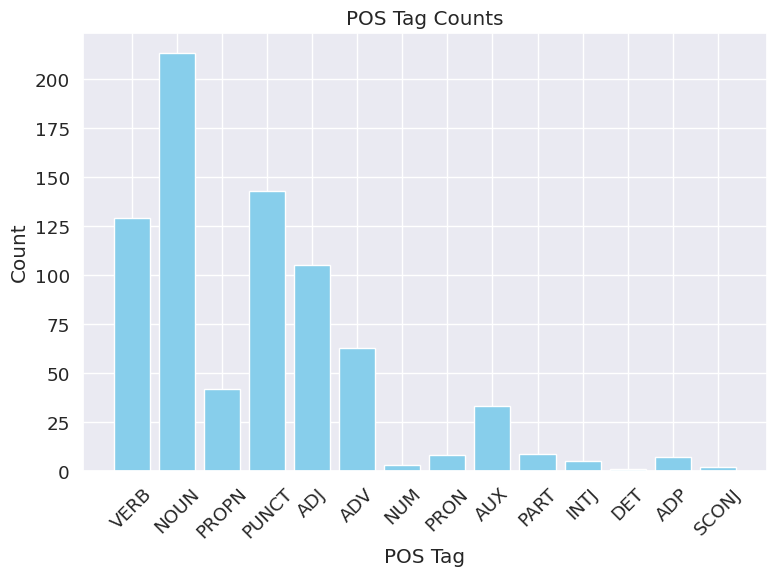

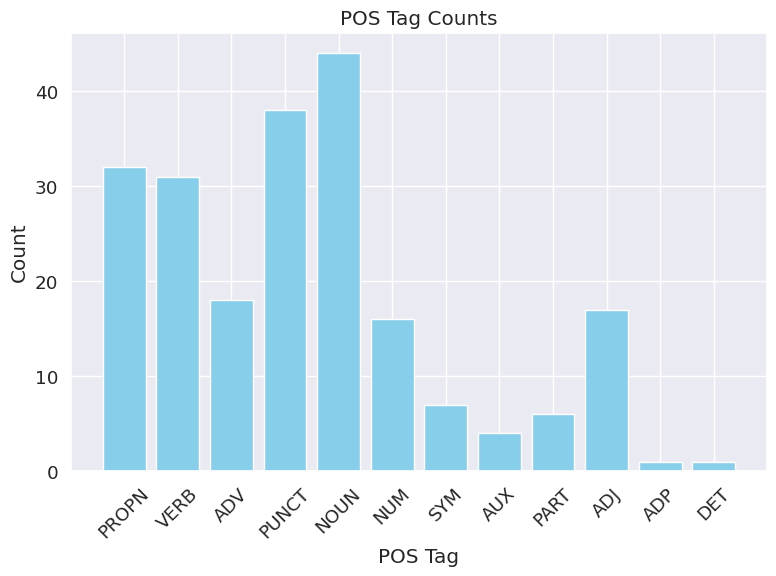

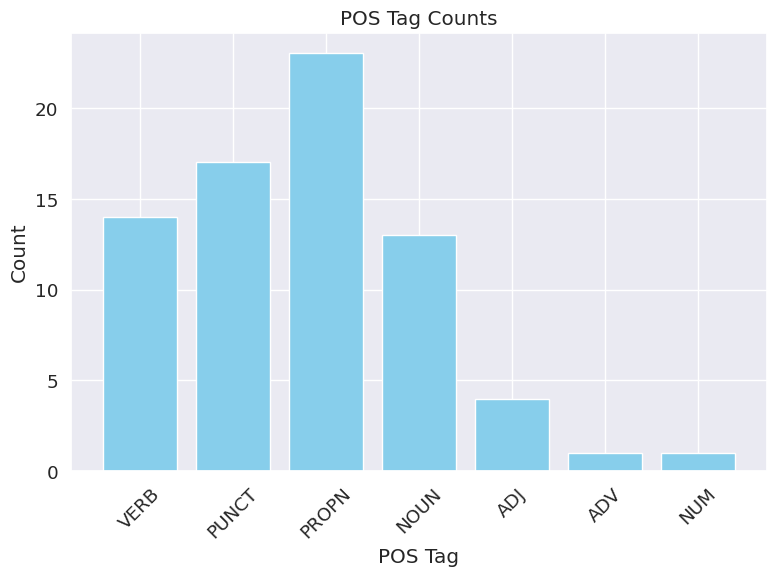

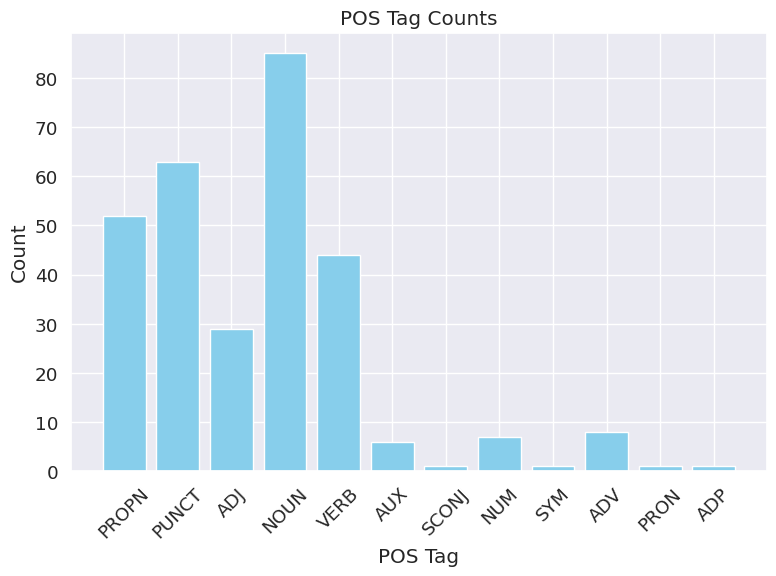

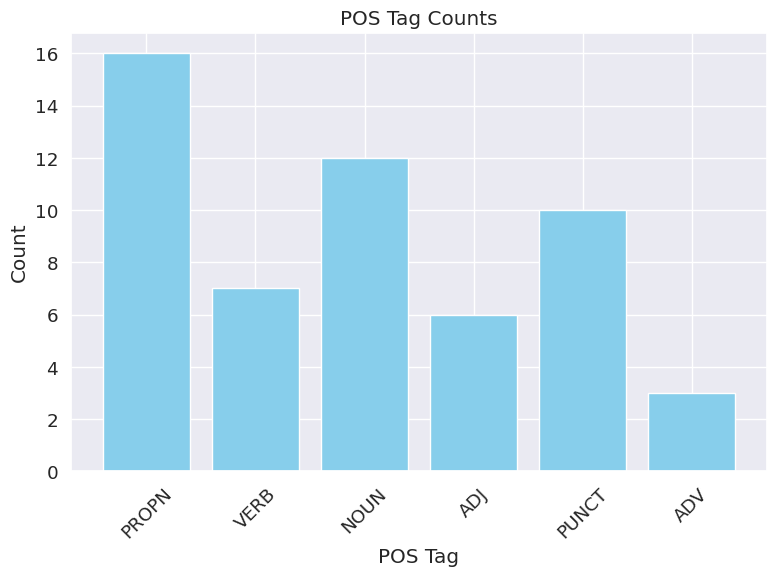

In [36]:
import matplotlib.pyplot as plt
for text in df["summary"].iloc[:5]:
    # Process the text with spaCy
    doc = nlp(text)
    
    # Count POS tags
    pos_count = doc.count_by(spacy.attrs.POS)
    
    # Convert POS tag IDs to their corresponding text representations
    pos_count_text = {doc.vocab[key].text: value for key, value in pos_count.items()}
    
    # Plot the POS tag counts using a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(pos_count_text.keys(), pos_count_text.values(), color='skyblue')
    plt.xlabel('POS Tag')
    plt.ylabel('Count')
    plt.title('POS Tag Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

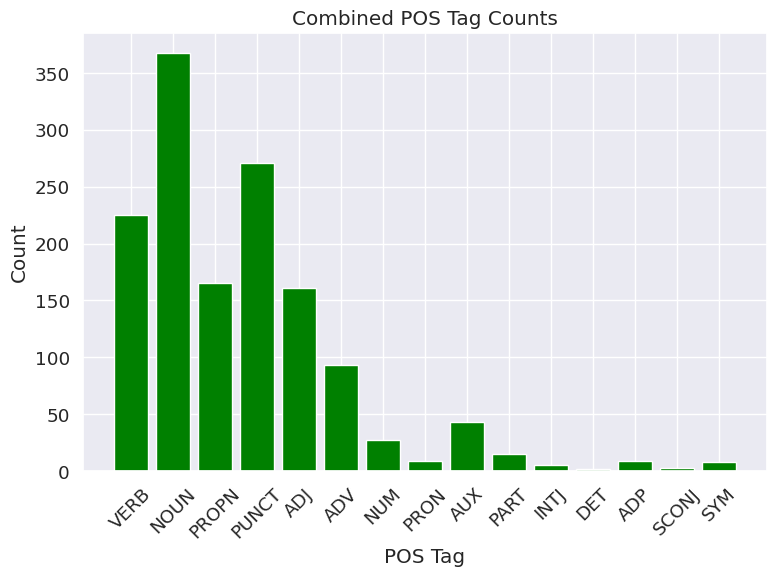

In [37]:
# Initialize an empty dictionary to store POS tag counts
pos_count_total = {}

# Assuming 'data' is your DataFrame containing text data
for text in df["summary"].iloc[:5]:
    # Process the text with spaCy
    doc = nlp(text)
    
    # Count POS tags for the current sentence
    pos_count = doc.count_by(spacy.attrs.POS)
    
    # Aggregate POS tag counts across all sentences
    for key, value in pos_count.items():
        pos_tag = doc.vocab[key].text
        pos_count_total[pos_tag] = pos_count_total.get(pos_tag, 0) + value

# Plot the combined POS tag counts using a bar chart
plt.figure(figsize=(8, 6))
plt.bar(pos_count_total.keys(), pos_count_total.values(), color='green')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.title('Combined POS Tag Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [38]:
pos = []
lemma = []
text = []

for tok in doc:
    pos.append(tok.pos_)
    lemma.append(tok.lemma_)
    text.append(tok.text)

In [39]:
nlp_table =  pd.DataFrame({"Text": text , "Lemma": lemma, "PoS": pos})
nlp_table

,Text,Lemma,PoS
0,Paris,Paris,PROPN
1,Hilton,Hilton,PROPN
2,arrived,arrive,VERB
3,LAX,LAX,PROPN
4,Wednesday,Wednesday,PROPN
5,dressed,dress,VERB
6,pay,pay,NOUN
7,last,last,ADJ
8,respects,respect,NOUN
9,uncle,uncle,NOUN


In [40]:
noun = []

for review in df["summary"]:
    doc = nlp(review)
    for tok in doc:
        if tok.pos_ == 'NOUN':
            noun.append(tok.lemma_.lower())
            

pd.Series(noun).value_counts().head()

year          2317
people        1739
time          1441
company       1193
government     796
Name: count, dtype: int64

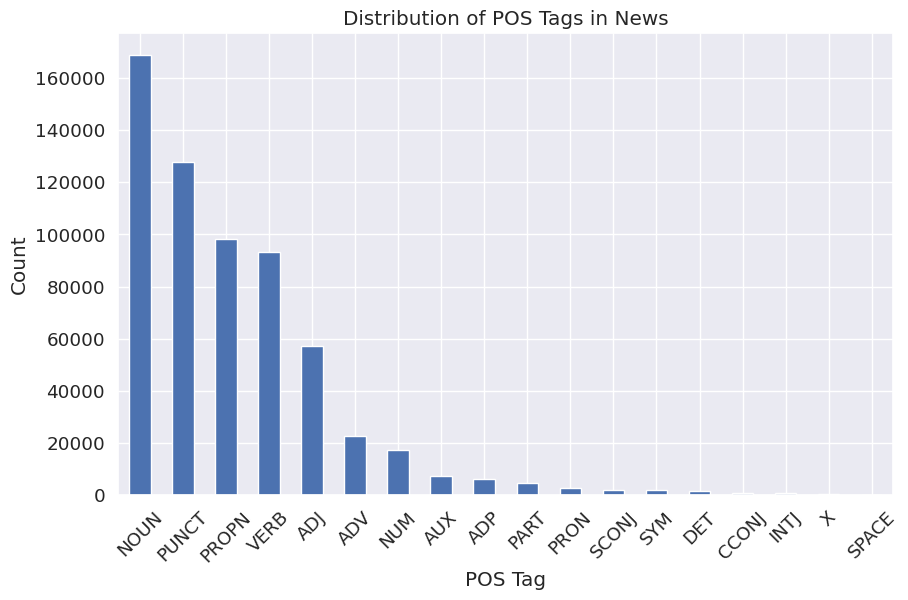

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df["summary"] contains your list of news and nlp is your spaCy model
# Make sure you have imported the necessary libraries and initialized the spaCy model (nlp)

# Create empty dictionary to store POS tag counts
pos_counts = {}

# Iterate through each review in the dataset
for review in df["summary"]:
    doc = nlp(review)
    # Iterate through each token in the review
    for token in doc:
        pos_tag = token.pos_
        # Check if POS tag is already in the dictionary, if not, add it with count 1
        if pos_tag not in pos_counts:
            pos_counts[pos_tag] = 1
        else:
            # If POS tag is already in the dictionary, increment its count by 1
            pos_counts[pos_tag] += 1

# Convert dictionary to pandas Series for easier manipulation
pos_counts_series = pd.Series(pos_counts)

# Sort the Series by counts in descending order
pos_counts_series_sorted = pos_counts_series.sort_values(ascending=False)

# Plot the distribution of POS tags
plt.figure(figsize=(10, 6))
pos_counts_series_sorted.plot(kind='bar')
plt.title('Distribution of POS Tags in News')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [4]:
import stanza
# Download the English model
stanza.download('en')
# Set up the pipeline with the constituency parsing processor
nlp = stanza.Pipeline (lang='en', processors=' tokenize, pos, constituency')
# Example sentence
text = "The quick brown fox jumps over the lazy dog."
# Process the text
doc = nlp(text)
# Access the constituency parse of the first sentence
constituency_parse = doc.sentences[0].constituency
# Print the parse tree
print(constituency_parse)

(ROOT (S (NP (DT The) (JJ quick) (JJ brown) (NN fox)) (VP (VBZ jumps) (PP (IN over) (NP (DT the) (JJ lazy) (NN dog)))) (. .)))


In [15]:
#entity recognition
import spacy
# Load Spacy model
nlp = spacy.load('en_core_web_sm')
# Example text
text = "Apple Inc. is looking to buy a U.K. startup for $1 billion. Tim Cook announced this yesterday in San Francisco."
# Process the text
doc = nlp(text)
# Display the named entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple Inc. ORG
U.K. GPE
$1 billion MONEY
Tim Cook PERSON
this yesterday DATE
San Francisco GPE


In [29]:
import spacy
import coreferee
nlp = spacy.load('en_core_web_md')
nlp.add_pipe('coreferee')
doc = nlp("Apple is looking at buying a startup. They are interested in its AI technology.")
print(doc._.coref_chains)

[0: [0], [8], 1: [6], [12]]


In [31]:
from spacy import displacy

# Visualize the coreference resolution with referring words
displacy.render(doc, style="ent", jupyter=True)


In [25]:
doc

Apple is looking at buying a startup. They are interested in its AI technology.